In [2]:

import torchvision

from EDFunctions import *

/data/marci/mjakowsk/miniconda3/envs/eds4ai/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image

In [5]:
trainset = torchvision.datasets.CIFAR10(root='./data/', train=True,
                                        download=True, transform=transforms.ToTensor())

testset = torchvision.datasets.CIFAR10(root='./data/', train=False,
                                        download=True, transform=transforms.ToTensor())

/data/marci/mjakowsk/miniconda3/envs/eds4ai/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [6]:
data = trainset.data
labels = np.array(range(0, 10))
targets = trainset.targets

In [7]:
quantiles = np.load("CIFAR10_train_quantiles.npy")

In [ ]:
all_indexes = np.array(range(0, len(targets)))

df = pd.DataFrame(data={
    "Index" : all_indexes,
    "Label" : targets,
    "Quantile" : quantiles
})

In [ ]:
label = 5

filt = (df["Label"] == label) & (df["Quantile"] <= 0.10)
filt = (df["Label"] == label) & (df["Quantile"] > 0.9)

In [107]:
#df2 = df[(df["Label"] == 9) & (df["Quantile"] <= 0.10)]
#df2 = df[(df["Label"] == 9) & (df["Quantile"] <= 0.10)]

def my_imshow(ind, filter):
    df2 = df[filter]

    ind = int(df2.iloc[ind]["Index"])
    img_array = data[ind][:][:][:]

    img = Image.fromarray(img_array)

    plt.imshow(img)
    plt.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # remove margins
    plt.margins(0, 0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())   # disable ticks
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.gcf().patch.set_facecolor('none')                  # no background
    plt.show()


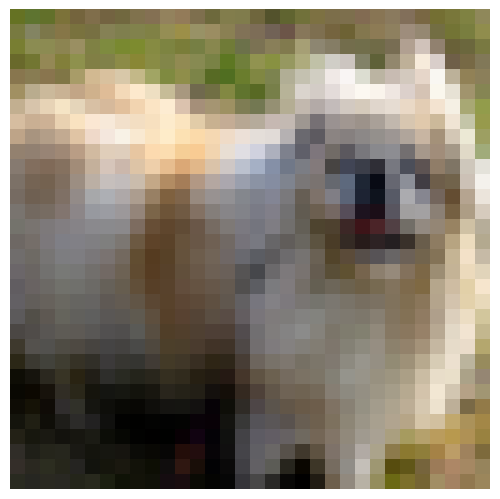

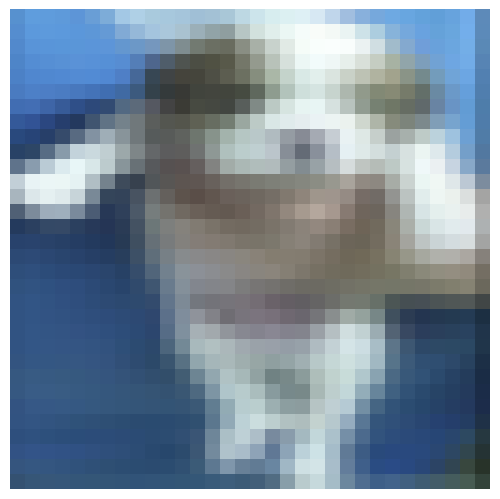

In [121]:
label = 5
filt = (df["Label"] == label) & (df["Quantile"] > 0)

my_imshow(1, filt)
my_imshow(6, filt)

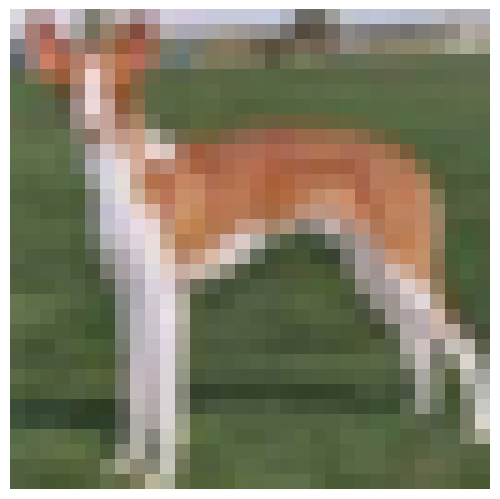

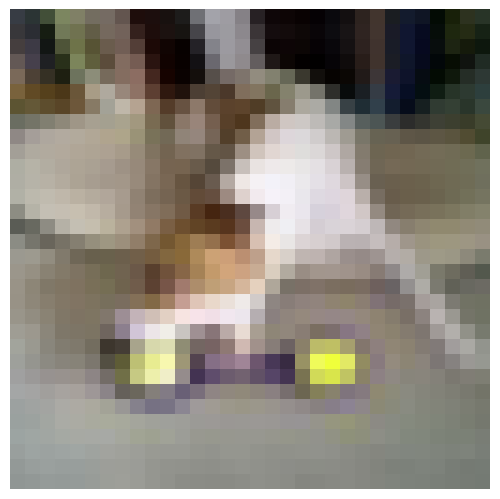

In [120]:
label = 5
filt = (df["Label"] == label) & (df["Quantile"] > 0.9)

my_imshow(1, filt)
my_imshow(6, filt)

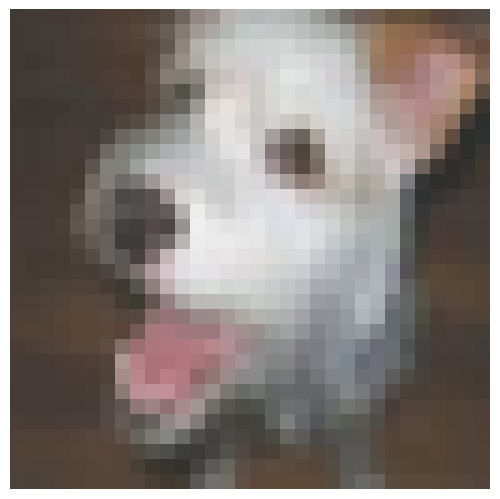

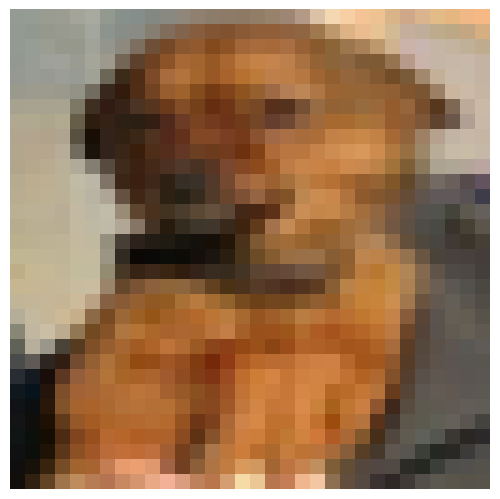

In [ ]:
label = 5
filt = (df["Label"] == label) & (df["Quantile"] <= 0.10)

my_imshow(9, filt)
my_imshow(7, filt)